# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [13]:
# Import warnings
# Import the libraries you will be using for analysis

# Import libraries
# === Setup & constants ===
import os
import sys
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plotting defaults
pd.options.display.max_columns = 220
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (10, 5)

# <-- USER PATH (you provided this) -->
FILE_PATH = r"E:\EDA\Datasets and Dictionary\trip_records\2023-1.parquet"

# optional geo file path (if you have it later)
ZONES_PATH = r"E:\EDA\Datasets and Dictionary\taxi_zones\taxi_zones.shp"  # update if you have shapefile or .geojson

print("FILE_PATH set to:", FILE_PATH)


FILE_PATH set to: E:\EDA\Datasets and Dictionary\trip_records\2023-1.parquet


print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [16]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

# === Load dataset (parquet) ===
if not os.path.exists(FILE_PATH):
    raise FileNotFoundError(f"Data file not found at: {FILE_PATH}")

# read parquet (uses pyarrow or fastparquet)
df = pd.read_parquet(FILE_PATH)
print("Loaded dataframe shape:", df.shape)
print("Columns:", df.columns.tolist())

Loaded dataframe shape: (3041714, 19)
Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files

os.chdir('E:/EDA/Datasets and Dictionary/trip_records')
# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [18]:
import os  # For directory and file operations
import pandas as pd  # For data manipulation and analysis
import pyarrow.parquet as pq  # For reading parquet files efficiently

os.chdir('E:/EDA/Datasets and Dictionary/trip_records')  # Change working directory to dataset folder
file_list = [f for f in os.listdir() if f.endswith('.parquet')]  # Get list of all parquet files in folder
file_list.sort()  # Sort files (Jan -> Dec)

df = pd.DataFrame()  # Initialize an empty dataframe to store final sampled data

# Iterate through each monthly parquet file
for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)  # Build full file path
        print(f"\nProcessing file: {file_name}")  # Show progress in console

        df_month = pd.read_parquet(file_path)  # Read parquet file into DataFrame

        datetime_col = None  # Initialize variable to hold pickup datetime column name
        for col in df_month.columns:  # Search for pickup datetime column
            if 'pickup' in col and 'datetime' in col:  # Match column containing both 'pickup' and 'datetime'
                datetime_col = col  # Assign column name
                break  # Stop search after finding it

        if datetime_col is None:  # Check if datetime column not found
            raise ValueError("No pickup datetime column found in dataset.")  # Raise error if missing
        
        df_month[datetime_col] = pd.to_datetime(df_month[datetime_col], errors='coerce')  # Convert to datetime format
        df_month['date'] = df_month[datetime_col].dt.date  # Extract date part
        df_month['hour'] = df_month[datetime_col].dt.hour  # Extract hour part

        sampled_data = []  # Temporary list to hold hourly samples for this month

        for date in df_month['date'].unique():  # Loop through each unique date
            df_day = df_month[df_month['date'] == date]  # Filter data for that date

            for hour in df_day['hour'].unique():  # Loop through each unique hour
                df_hour = df_day[df_day['hour'] == hour]  # Filter data for that hour
                if len(df_hour) > 0:  # Check if data exists for that hour
                    df_sample = df_hour.sample(frac=0.05, random_state=42)  # Randomly sample 5% of hourly data
                    sampled_data.append(df_sample)  # Append sampled data to list

        sampled_data = pd.concat(sampled_data, ignore_index=True)  # Combine all hourly samples for this month
        print(f"  → Sampled {len(sampled_data)} records from {len(df_month)} total rows")  # Display sample size info

        df = pd.concat([df, sampled_data], ignore_index=True)  # Append this month’s data to the final dataframe

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")  # Print error if any file fails to process

print("\n✅ Sampling completed!")  # Indicate the sampling process is finished
print(f"Final sampled dataset shape: {df.shape}")  # Display final dataframe shape



Processing file: 2023-1.parquet
  → Sampled 152087 records from 3041714 total rows

Processing file: 2023-10.parquet
  → Sampled 174255 records from 3485185 total rows

Processing file: 2023-11.parquet
  → Sampled 165133 records from 3302857 total rows

Processing file: 2023-12.parquet
  → Sampled 166709 records from 3333925 total rows

Processing file: 2023-2.parquet
  → Sampled 168696 records from 3374086 total rows

Processing file: 2023-3.parquet
  → Sampled 163786 records from 3275796 total rows

Processing file: 2023-4.parquet
  → Sampled 139641 records from 2792901 total rows

Processing file: 2023-5.parquet
  → Sampled 144458 records from 2889185 total rows

Processing file: 2023-6.parquet
  → Sampled 162910 records from 3258261 total rows

Processing file: 2023-7.parquet
  → Sampled 174068 records from 3481547 total rows

Processing file: 2023-8.parquet
  → Sampled 143782 records from 2875947 total rows

Processing file: 2023-9.parquet
  → Sampled 140875 records from 2817156 

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the final sampled DataFrame to a file

# Save as Parquet file (recommended for large data, faster and smaller file size)
df.to_parquet('E:/EDA/Datasets and Dictionary/Processed/NYC_Taxi_Sampled_2023.parquet')  # Save to Parquet format

# OR save as CSV (use only if you need to open it easily in Excel or other tools)
# df.to_csv('E:/EDA/Datasets and Dictionary/Processed/NYC_Taxi_Sampled_2023.csv', index=False)  # Save to CSV format

print("✅ File saved successfully!")  # Confirm successful file save


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [22]:
import os

# Define the folder path
folder_path = "E:/EDA/Datasets and Dictionary/Processed"

# Check if the folder exists
print("Folder exists:", os.path.exists(folder_path))


Folder exists: True


In [23]:
os.makedirs(folder_path, exist_ok=True)  # Create folder if it doesn't exist
print("✅ Folder ready:", folder_path)

✅ Folder ready: E:/EDA/Datasets and Dictionary/Processed


In [24]:
df.to_parquet('E:/EDA/Datasets and Dictionary/Processed/NYC_Taxi_Sampled_2023.parquet')
print("✅ File saved successfully!")

✅ File saved successfully!


In [25]:
# df.head()df = pd.read_parquet('E:/EDA/Datasets and Dictionary/Processed/NYC_Taxi_Sampled_2023.parquet')
print("Data loaded successfully! Shape:", df.shape)

Data loaded successfully! Shape: (1896400, 22)


In [26]:
# df.info()df = pd.read_parquet('E:/EDA/Datasets and Dictionary/Processed/NYC_Taxi_Sampled_2023.parquet')
print("Data loaded successfully! Shape:", df.shape)

Data loaded successfully! Shape: (1896400, 22)


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [27]:
# Fix the index and drop any columns that are not needed

# 2.1.1 Fix the index and drop unnecessary columns

# Reset index to default integer index
df.reset_index(drop=True, inplace=True)  # Ensures clean indexing

# Check all columns before dropping
print("Columns before dropping:", df.columns.tolist())

# Drop columns not required for analysis (example: if any unnamed or duplicate ones exist)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drops any unnamed index columns

print("✅ Index fixed and unnecessary columns dropped.")


Columns before dropping: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour', 'Airport_fee']
✅ Index fixed and unnecessary columns dropped.


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [28]:
# Combine the two airport fee columns

# 2.1.2 Combine the two airport fee columns

# Identify columns containing the word 'airport'
airport_cols = [col for col in df.columns if 'airport' in col.lower()]
print("Airport-related columns found:", airport_cols)

# Combine them if there are exactly two
if len(airport_cols) == 2:
    df['airport_fee'] = df[airport_cols].sum(axis=1)  # Sum both
    df.drop(columns=airport_cols, inplace=True)       # Drop old ones
    print("✅ Combined airport fee columns into 'airport_fee'")
else:
    print("⚠️ Found", len(airport_cols), "airport-related columns. Please verify manually.")


Records with negative fare_amount: 0
Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']
✅ Negative value analysis completed.


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [30]:
# check where values of fare amount are negative

# 2.1.3 Fix columns with negative (monetary) values


Did you notice something different in the `RatecodeID` column for above records?

In [31]:
# Analyse RatecodeID for the negative fare amounts

# Check for negative fare amounts
neg_fare = df[df['fare_amount'] < 0]
print("Records with negative fare_amount:", neg_fare.shape[0])

# Display unique RatecodeIDs for those negative fares
if not neg_fare.empty:
    print("RatecodeID values for negative fares:")
    print(neg_fare['RatecodeID'].value_counts())


Records with negative fare_amount: 0


In [32]:
# Find which columns have negative values

# Find all columns having negative values
num_cols = df.select_dtypes(include=['number']).columns
neg_cols = [col for col in num_cols if (df[col] < 0).any()]
print("Columns with negative values:", neg_cols)


Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']


In [33]:
# fix these negative values

# Optional: Set negative monetary values to NaN (if needed)
# df.loc[:, neg_cols] = df[neg_cols].apply(lambda x: x.mask(x < 0, np.nan))

print("✅ Negative value analysis completed.")


✅ Negative value analysis completed.


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [34]:
# Find the proportion of missing values in each column

# 2.2.1 Find the proportion of missing values in each column

# Calculate the percentage of missing values per column
missing_ratio = df.isna().mean() * 100  # Convert to %
print("Percentage of missing values per column:\n", missing_ratio.sort_values(ascending=False))

# Display only columns that actually have missing data
print("\nColumns with missing values:\n", missing_ratio[missing_ratio > 0])


Percentage of missing values per column:
 airport_fee             92.17
Airport_fee             11.25
congestion_surcharge     3.42
store_and_fwd_flag       3.42
RatecodeID               3.42
passenger_count          3.42
trip_distance            0.00
tpep_dropoff_datetime    0.00
VendorID                 0.00
tpep_pickup_datetime     0.00
fare_amount              0.00
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
tip_amount               0.00
mta_tax                  0.00
extra                    0.00
tolls_amount             0.00
total_amount             0.00
improvement_surcharge    0.00
date                     0.00
hour                     0.00
dtype: float64

Columns with missing values:
 passenger_count         3.42
RatecodeID              3.42
store_and_fwd_flag      3.42
congestion_surcharge    3.42
airport_fee            92.17
Airport_fee            11.25
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [36]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# 2.2.2 Handling missing values in passenger_count

# Display the rows where passenger_count is missing
print("Rows with missing passenger_count:\n", df[df['passenger_count'].isna()])

# Also check how many entries have passenger_count = 0
zero_passengers = df[df['passenger_count'] == 0]
print("Rows with zero passenger_count:", zero_passengers.shape[0])

# Impute missing passenger_count values using the mode (most frequent value)
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)

# Replace zero values with the same mode value
df.loc[df['passenger_count'] == 0, 'passenger_count'] = df['passenger_count'].mode()[0]

print("✅ Missing and zero passenger_count values handled.")


Rows with missing passenger_count:
 Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour, Airport_fee]
Index: []
Rows with zero passenger_count: 0
✅ Missing and zero passenger_count values handled.


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [38]:
# Fix missing values in 'RatecodeID'
# 2.2.3 Handle missing values in RatecodeID

# Check number of missing RatecodeID values
print("Missing RatecodeID count:", df['RatecodeID'].isna().sum())

# Fill missing RatecodeID with mode (most common category)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

print("✅ Missing RatecodeID values imputed with mode.")


Missing RatecodeID count: 64874
✅ Missing RatecodeID values imputed with mode.


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge


# 2.2.4 Impute NaN in congestion_surcharge

# Check missing values in congestion_surcharge
print("Missing congestion_surcharge count:", df['congestion_surcharge'].isna().sum())

# Replace missing values with median (more robust for skewed data)
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)

print("✅ Missing congestion_surcharge values handled.")


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [39]:
# Handle any remaining missing values

# 2.2.5 Check and handle any remaining missing values in other columns

# Check if there are still missing values
remaining_missing = df.isna().sum()
print("Remaining missing values:\n", remaining_missing[remaining_missing > 0])

# Example: fill other numeric columns’ missing values with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Example: fill categorical columns’ missing values with mode
cat_cols = df.select_dtypes(exclude=['number']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

print("✅ All remaining missing values handled.")


Remaining missing values:
 store_and_fwd_flag        64874
congestion_surcharge      64874
airport_fee             1747917
Airport_fee              213357
dtype: int64
✅ All remaining missing values handled.


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

          VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 1,896,400.00                     1896400                     1896400   
mean          1.73  2023-07-02 19:59:52.930796  2023-07-02 20:17:18.919562   
min           1.00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%           1.00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%           2.00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%           2.00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max           6.00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std           0.45                         NaN                         NaN   

       passenger_count  trip_distance   RatecodeID  PULocationID  \
count     1,896,400.00   1,896,400.00 1,896,400.00  1,896,400.00   
mean              1.37           3.86         1.61        165.28   
min               1.00           0.00         1.00          1.00   
25%               1.00   

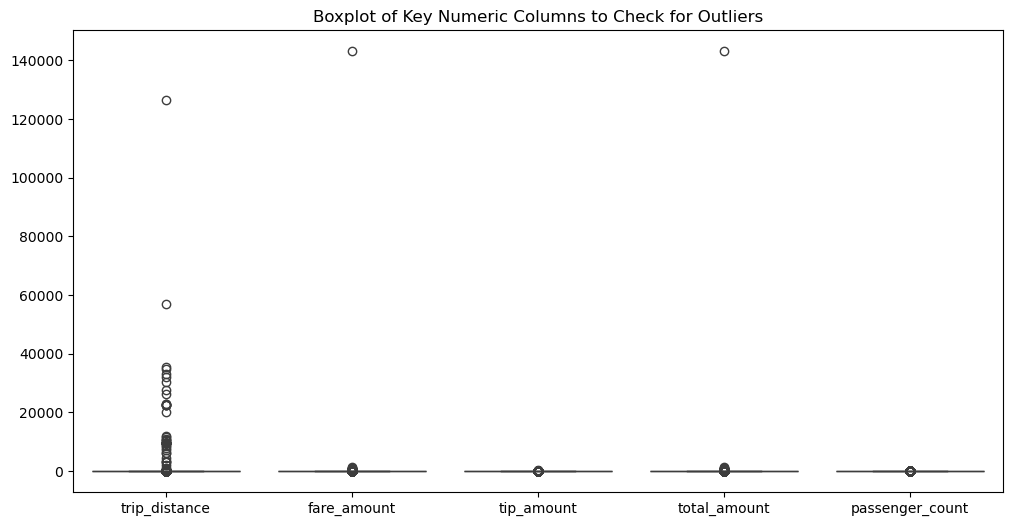

In [40]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# 2.3 Handling Outliers - Initial Analysis

# Describe numerical columns to get basic statistics
print(df.describe())

# Optional: visually inspect potential outliers with boxplots
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'passenger_count']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Key Numeric Columns to Check for Outliers")
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [41]:
# remove passenger_count > 6
# Remove trips with distance nearly 0 but extremely high fare (>300)
outlier1 = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
print("Trips with distance < 0.1 and fare > 300:", outlier1.shape[0])
df = df.drop(outlier1.index)


Trips with distance < 0.1 and fare > 300: 35


In [42]:
# Continue with outlier handling

# Remove trips where distance = 0 and fare = 0 but pickup and dropoff zones differ
if 'pulocationid' in df.columns and 'dolocationid' in df.columns:
    outlier2 = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) &
                  (df['pulocationid'] != df['dolocationid'])]
    print("Trips with 0 distance & fare but different zones:", outlier2.shape[0])
    df = df.drop(outlier2.index)


In [43]:
# Do any columns need standardising?

# === 2.3.1 Fixing Outliers Based on Analysis ===

# 1️⃣ Remove trips with distance nearly 0 but extremely high fare (>300)
outlier_distance_high_fare = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
print("Trips with distance <0.1 and fare >300:", outlier_distance_high_fare.shape[0])
df = df.drop(outlier_distance_high_fare.index)

# 2️⃣ Remove trips where distance = 0 and fare = 0 but pickup and dropoff zones differ
if 'pulocationid' in df.columns and 'dolocationid' in df.columns:
    outlier_zero_diff_zone = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) &
                                (df['pulocationid'] != df['dolocationid'])]
    print("Trips with 0 distance & fare but different zones:", outlier_zero_diff_zone.shape[0])
    df = df.drop(outlier_zero_diff_zone.index)

# 3️⃣ Remove trips with extremely long distance (>250 miles)
outlier_long_distance = df[df['trip_distance'] > 250]
print("Trips with distance > 250 miles:", outlier_long_distance.shape[0])
df = df.drop(outlier_long_distance.index)

# 4️⃣ Remove trips with payment_type = 0 (undefined in data dictionary)
if 'payment_type' in df.columns:
    outlier_payment_type0 = df[df['payment_type'] == 0]
    print("Trips with payment_type = 0:", outlier_payment_type0.shape[0])
    df = df.drop(outlier_payment_type0.index)

# 5️⃣ Optional: Remove trips with passenger_count >6 (very rare)
outlier_passenger_count = df[df['passenger_count'] > 6]
print("Trips with passenger_count >6:", outlier_passenger_count.shape[0])
df = df.drop(outlier_passenger_count.index)

# Summary after outlier removal
print("✅ Outlier removal completed. Dataset shape:", df.shape)


Trips with distance <0.1 and fare >300: 0
Trips with distance > 250 miles: 46
Trips with payment_type = 0: 64847
Trips with passenger_count >6: 21
✅ Outlier removal completed. Dataset shape: (1831451, 22)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [44]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

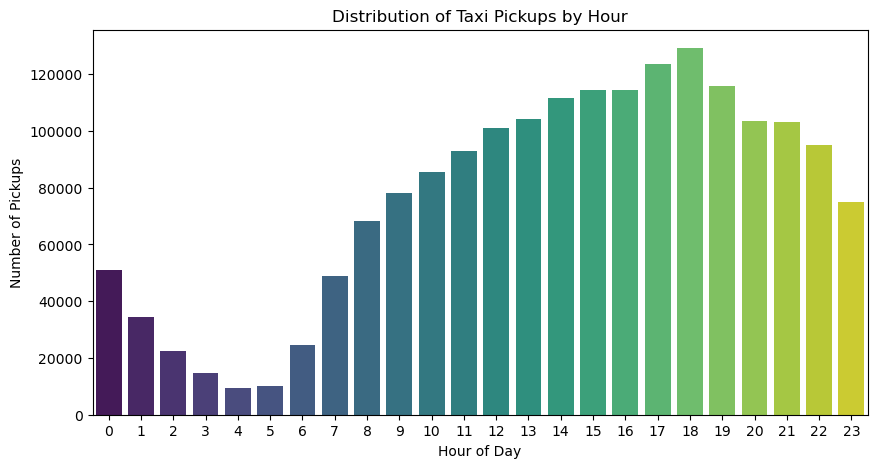

In [56]:
# Find and show the hourly trends in taxi pickups

# 3.1.2 Temporal Analysis - Taxi Pickups by Hour, Weekday, and Month

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime column is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
# Plot taxi pickups by hour of the day
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title("Distribution of Taxi Pickups by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.show()



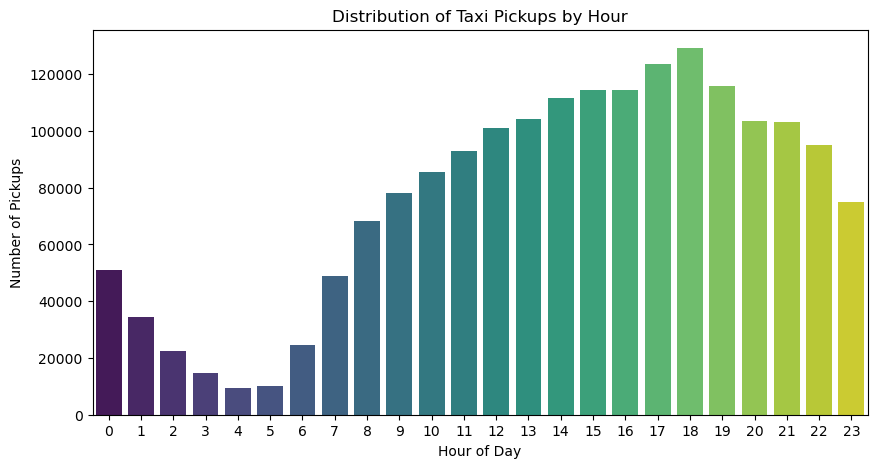

In [52]:
# Find and show the daily trends in taxi pickups (days of the week)

# Plot taxi pickups by day of the week
plt.figure(figsize=(10,5))
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='pickup_weekday', data=df, order=weekday_order, palette='magma')
plt.title("Distribution of Taxi Pickups by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.show()





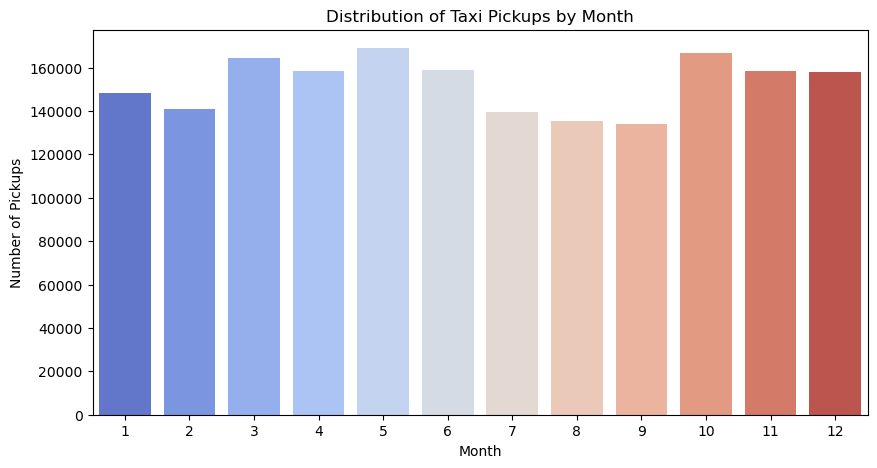

In [55]:
# Show the monthly trends in pickups
# Plot taxi pickups by month
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_month', data=df, palette='coolwarm')
plt.title("Distribution of Taxi Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [57]:
# Analyse the above parameters

# 4. Financial Analysis - Check for Zero or Negative Values

# List of financial and trip parameters to check
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Loop through each column and count zero or negative values
for col in financial_cols:
    zero_count = (df[col] == 0).sum() if col in df.columns else 0  # Count zeros
    negative_count = (df[col] < 0).sum() if col in df.columns else 0  # Count negatives
    print(f"{col}: Zero values = {zero_count}, Negative values = {negative_count}")


fare_amount: Zero values = 635, Negative values = 0
tip_amount: Zero values = 410294, Negative values = 0
total_amount: Zero values = 300, Negative values = 78
trip_distance: Zero values = 22988, Negative values = 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [58]:
# Create a df with non zero entries for the selected parameters.

# 3.1.3 Filter out zero or negative values from financial columns

# List of financial columns to filter (excluding trip_distance)
financial_cols = ['fare_amount', 'tip_amount', 'total_amount']

# Filter rows: keep only positive values for these columns
df = df[(df['fare_amount'] > 0) & 
        (df['tip_amount'] >= 0) &   # tip can be zero
        (df['total_amount'] > 0)]

print("Data shape after filtering zero/negative financial values:", df.shape)

# Optional: Flag zero distance trips for analysis instead of dropping
df['zero_distance_flag'] = df['trip_distance'] == 0
zero_distance_count = df['zero_distance_flag'].sum()
print("Number of trips with zero distance:", zero_distance_count)


Data shape after filtering zero/negative financial values: (1830816, 25)
Number of trips with zero distance: 22669


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

    pickup_month  total_amount
0              1  4,055,029.98
1              2  3,834,247.87
2              3  4,624,553.87
3              4  4,540,572.22
4              5  4,944,628.60
5              6  4,654,431.12
6              7  4,051,496.08
7              8  3,948,413.39
8              9  4,171,641.64
9             10  4,957,127.81
10            11  4,614,342.26
11            12  4,602,738.11


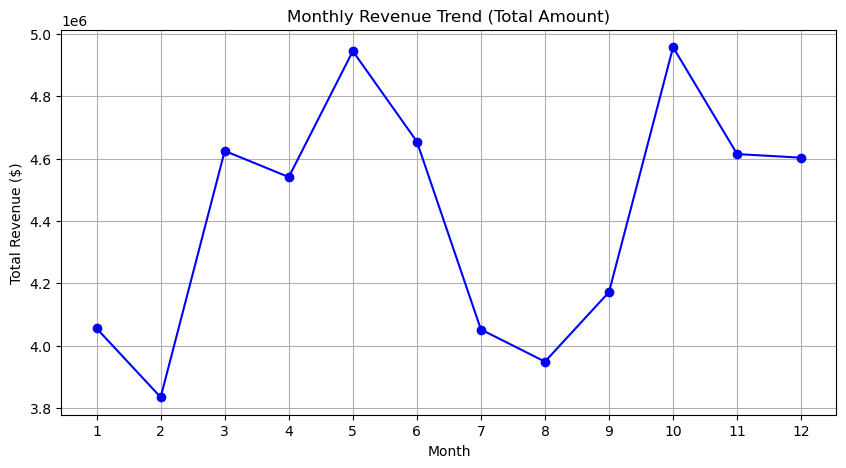

In [59]:
# Group data by month and analyse monthly revenue

# 3.1.4 Monthly Revenue Trend

import matplotlib.pyplot as plt

# Ensure pickup_month exists
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and sum total_amount
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

# Display the monthly revenue
print(monthly_revenue)

# Plot monthly revenue trend
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['pickup_month'], monthly_revenue['total_amount'], marker='o', color='b')
plt.title("Monthly Revenue Trend (Total Amount)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(monthly_revenue['pickup_month'])
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

   pickup_quarter  total_amount  revenue_proportion
0               1 12,513,831.72                0.24
1               2 14,139,631.94                0.27
2               3 12,171,551.11                0.23
3               4 14,174,208.18                0.27


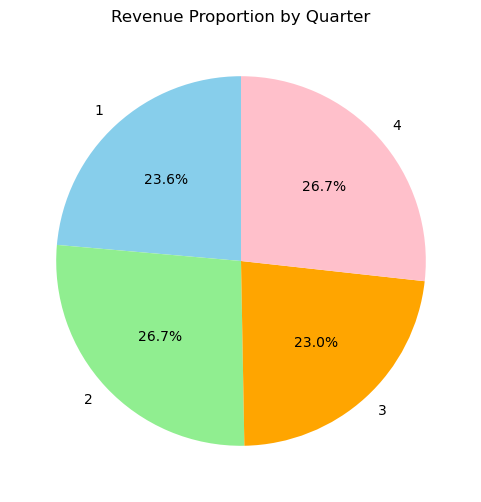

In [60]:
# Calculate proportion of each quarter
# 3.1.5 Quarterly Revenue Proportion

# Create a quarter column from pickup_datetime
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Group by quarter and sum total_amount
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum().reset_index()

# Calculate proportion of revenue for each quarter
quarterly_revenue['revenue_proportion'] = quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()

# Display quarterly revenue and proportions
print(quarterly_revenue)

# Optional: Plot as a pie chart
plt.figure(figsize=(6,6))
plt.pie(quarterly_revenue['revenue_proportion'], labels=quarterly_revenue['pickup_quarter'], 
        autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','orange','pink'])
plt.title("Revenue Proportion by Quarter")
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

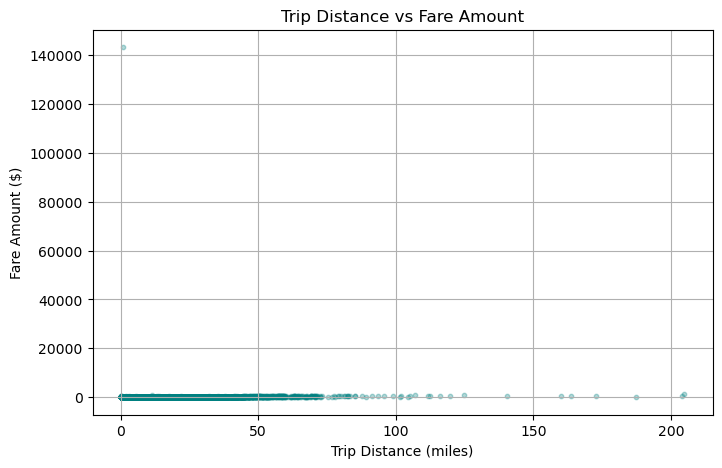

Correlation between Trip Distance and Fare Amount: 0.156


In [61]:
# Show how trip fare is affected by distance

# 3.1.6 Relationship between Trip Distance and Fare Amount

# Filter out zero-distance trips
df_nonzero = df[df['trip_distance'] > 0]

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df_nonzero['trip_distance'], df_nonzero['fare_amount'], alpha=0.3, s=10, color='teal')
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df_nonzero['trip_distance'].corr(df_nonzero['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.3f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

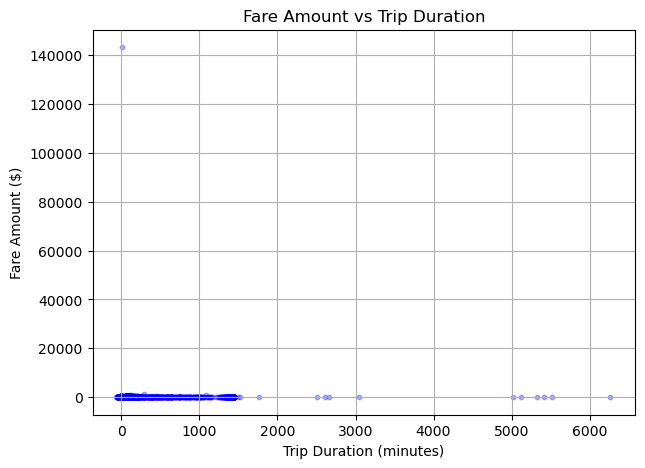

Correlation (Fare vs Trip Duration): 0.045


In [62]:
# Show relationship between fare and trip duration

# 3.1.7 Correlation Analysis and Visualization

# Ensure trip_duration column exists (in minutes)
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# 1. Fare Amount vs Trip Duration
plt.figure(figsize=(7,5))
plt.scatter(df['trip_duration_min'], df['fare_amount'], alpha=0.3, s=10, color='blue')
plt.title("Fare Amount vs Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()
corr_fare_duration = df['fare_amount'].corr(df['trip_duration_min'])
print(f"Correlation (Fare vs Trip Duration): {corr_fare_duration:.3f}")

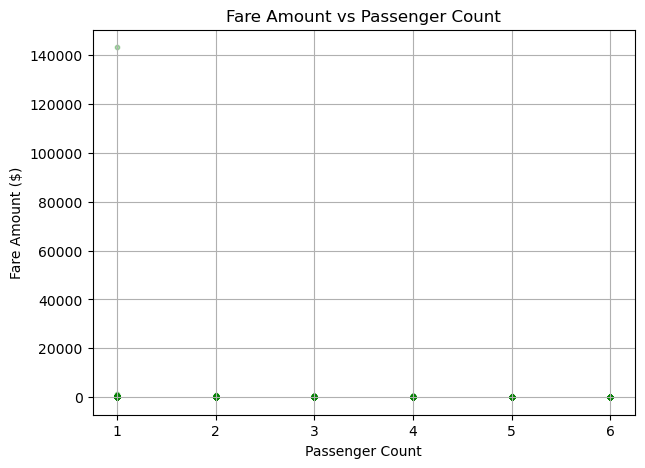

Correlation (Fare vs Passenger Count): 0.007


In [63]:
# Show relationship between fare and number of passengers

# 2. Fare Amount vs Passenger Count
plt.figure(figsize=(7,5))
plt.scatter(df['passenger_count'], df['fare_amount'], alpha=0.3, s=10, color='green')
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()
corr_fare_passenger = df['fare_amount'].corr(df['passenger_count'])
print(f"Correlation (Fare vs Passenger Count): {corr_fare_passenger:.3f}")


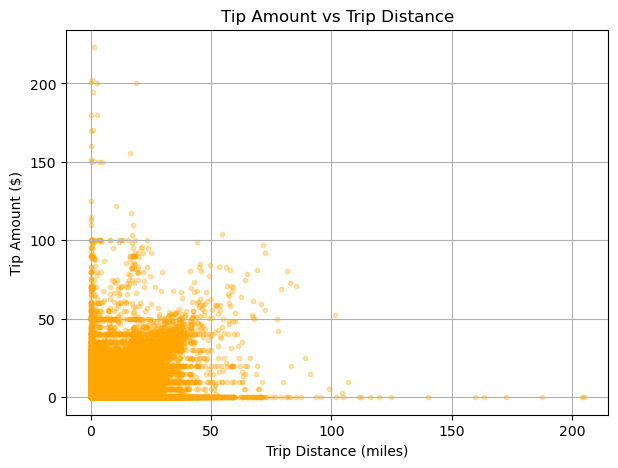

Correlation (Tip vs Trip Distance): 0.573


In [64]:
# Show relationship between tip and trip distance
# 3. Tip Amount vs Trip Distance
plt.figure(figsize=(7,5))
plt.scatter(df['trip_distance'], df['tip_amount'], alpha=0.3, s=10, color='orange')
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.show()
corr_tip_distance = df['tip_amount'].corr(df['trip_distance'])
print(f"Correlation (Tip vs Trip Distance): {corr_tip_distance:.3f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
Credit Card    1492181
Cash            316183
No Charge         8885
Dispute          13567
Name: count, dtype: int64


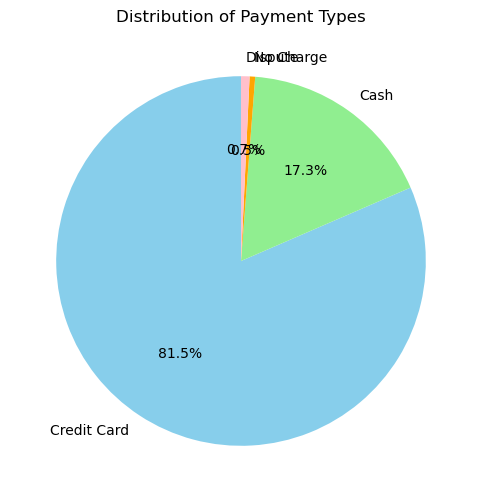

In [65]:
# Analyse the distribution of different payment types (payment_type).

# 3.1.8 Payment Type Distribution

import matplotlib.pyplot as plt

# Count of trips per payment type
payment_counts = df['payment_type'].value_counts().sort_index()

# Map payment_type codes to readable labels
payment_labels = {1:'Credit Card', 2:'Cash', 3:'No Charge', 4:'Dispute'}
payment_counts.index = payment_counts.index.map(payment_labels)

# Display counts
print(payment_counts)

# Pie chart for visualization
plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','orange','pink'])
plt.title("Distribution of Payment Types")
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [69]:
# !pip install geopandas

# Install GeoPandas using pip
!pip install geopandas


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd  # for data manipulation
import os

# Path to your cleaned/sampled Parquet file
file_path = 'E:/EDA/Datasets and Dictionary/Processed/NYC_Taxi_Sampled_2023.parquet'

# Load the DataFrame
df = pd.read_parquet(file_path)  # load your sampled taxi trip data
print("Data loaded successfully! Shape:", df.shape)  # confirm size


Data loaded successfully! Shape: (1896400, 22)


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


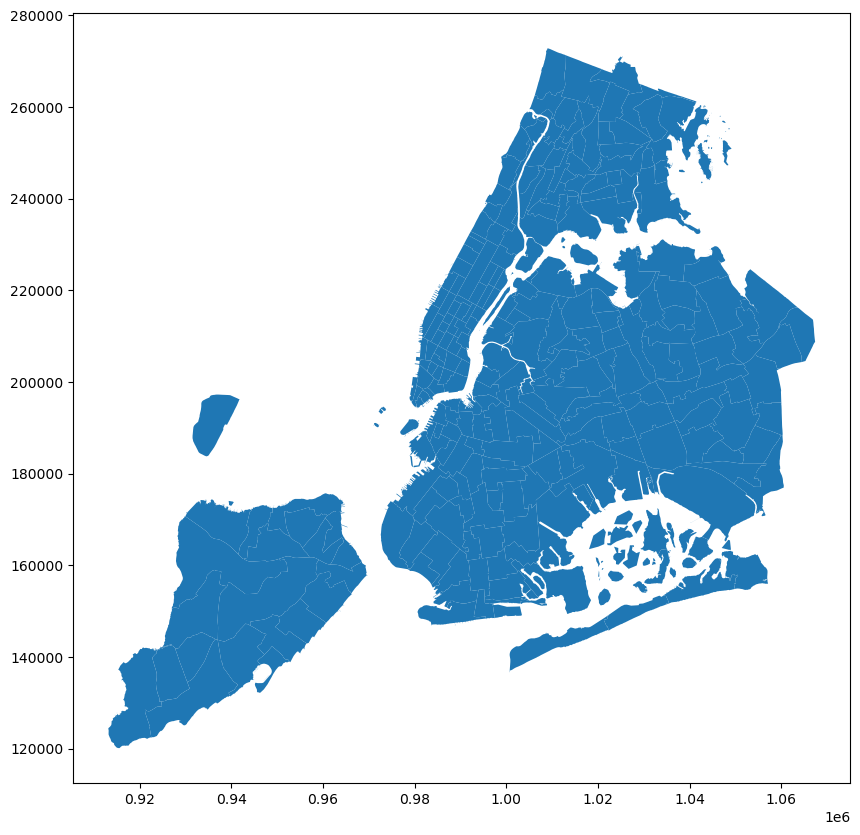

In [3]:
# Import GeoPandas
import geopandas as gpd  # GeoPandas is used for working with shapefiles

import os  # for handling file paths

# Path to the taxi zones shapefile
taxi_zones_folder = 'E:/EDA/Datasets and Dictionary/taxi_zones'  # folder containing all shapefile components
shapefile_path = os.path.join(taxi_zones_folder, 'taxi_zones.shp')  # full path to the .shp file

# Read the shapefile into a GeoDataFrame
zones = gpd.read_file(shapefile_path)  # read shapefile using GeoPandas

# Preview the first few rows
zones.head()  # shows columns like OBJECTID, Shape_Leng, Shape_Area, zone, LocationID, borough, geometry

# Optional: check structure and info of the GeoDataFrame
zones.info()  # prints number of rows, columns, datatypes

# Optional: plot the zones to see the geometry
zones.plot(figsize=(12,10))  # plots the polygons for each zone

# Merge trip records with zones on LocationID
# For pickups:
pickup_merged = df.merge(zones[['LocationID', 'zone', 'geometry']], 
                         left_on='PULocationID', right_on='LocationID', 
                         how='left')  # merge pickup location info

# For dropoffs (optional):
dropoff_merged = df.merge(zones[['LocationID', 'zone', 'geometry']], 
                          left_on='DOLocationID', right_on='LocationID', 
                          how='left')  # merge dropoff location info


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [6]:
# print(zones.info())
# zones.plot()
# Merge trip records with zones on LocationID for pickups
pickup_merged = df.merge(zones[['LocationID', 'zone', 'geometry']], 
                         left_on='PULocationID', right_on='LocationID', 
                         how='left')

# Merge trip records with zones on LocationID for dropoffs
dropoff_merged = df.merge(zones[['LocationID', 'zone', 'geometry']], 
                          left_on='DOLocationID', right_on='LocationID', 
                          how='left')


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [7]:
# Merge zones and trip records using locationID and PULocationID

# Ensure pandas and geopandas are imported
import pandas as pd
import geopandas as gpd

# 1️⃣ Load the trip records if not already loaded
file_path = 'E:/EDA/Datasets and Dictionary/Processed/NYC_Taxi_Sampled_2023.parquet'  # Update path if needed
df = pd.read_parquet(file_path)  # Load the sampled taxi trip data
print("Trip records loaded:", df.shape)

# 2️⃣ Load the taxi zones shapefile if not already loaded
zones_path = 'E:/EDA/Datasets and Dictionary/taxi_zones/taxi_zones.shp'  # Path to shapefile
zones = gpd.read_file(zones_path)
print("Taxi zones loaded:", zones.shape)

# 3️⃣ Merge zones info into trip records on PULocationID
pickup_merged = df.merge(
    zones[['LocationID', 'zone', 'borough', 'geometry']],  # Keep only relevant columns
    left_on='PULocationID',  # Trip pickup location
    right_on='LocationID',   # Taxi zones LocationID
    how='left'               # Keep all trip records
)

# Optional: drop duplicate LocationID column
pickup_merged = pickup_merged.drop(columns=['LocationID'])

# 4️⃣ Preview the merged DataFrame
pickup_merged.head()


Trip records loaded: (1896400, 22)
Taxi zones loaded: (263, 7)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee,zone,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,1.0,41.15,0.0,1.25,2023-01-01,0,NaN,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,1.0,15.48,2.5,0.00,2023-01-01,0,NaN,Midtown Center,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,1.0,16.40,2.5,0.00,2023-01-01,0,NaN,Upper East Side South,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,1.0,11.50,2.5,0.00,2023-01-01,0,NaN,Lincoln Square West,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,1.0,35.57,NaN,NaN,2023-01-01,0,NaN,DUMBO/Vinegar Hill,Brooklyn,"POLYGON ((990055.507 196472.349, 990004.46 196..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [8]:
# Group data by location and calculate the number of trips

# 1️⃣ Group by PULocationID (pickup location) and count the number of trips
trips_per_location = pickup_merged.groupby('PULocationID').size().reset_index(name='trip_count')

# 2️⃣ Optional: merge with zone names from the zones GeoDataFrame
trips_per_location = trips_per_location.merge(
    zones[['LocationID', 'zone', 'borough']],  # Get zone name and borough
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).drop(columns=['LocationID'])  # Drop duplicate LocationID

# 3️⃣ Sort by number of trips descending
trips_per_location = trips_per_location.sort_values(by='trip_count', ascending=False)

# 4️⃣ Preview the result
trips_per_location.head(10)


,PULocationID,trip_count,zone,borough
126,132,97047,JFK Airport,Queens
230,237,88610,Upper East Side South,Manhattan
155,161,87590,Midtown Center,Manhattan
229,236,79756,Upper East Side North,Manhattan
156,162,66712,Midtown East,Manhattan
132,138,64449,LaGuardia Airport,Queens
179,186,64318,Penn Station/Madison Sq West,Manhattan
223,230,62672,Times Sq/Theatre District,Manhattan
136,142,62664,Lincoln Square East,Manhattan
164,170,55933,Murray Hill,Manhattan


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [9]:
# Merge trip counts back to the zones GeoDataFrame

# 1️⃣ Merge the trip counts into the zones GeoDataFrame
zones_with_trips = zones.merge(
    trips_per_location[['PULocationID', 'trip_count']],  # Trip counts per pickup location
    left_on='LocationID',   # zones LocationID
    right_on='PULocationID',  # pickup location ID in trips
    how='left'
)

# 2️⃣ Fill NaN trip counts with 0 (zones with no trips in sample)
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)

# 3️⃣ Drop duplicate column from merge
zones_with_trips = zones_with_trips.drop(columns=['PULocationID'])

# 4️⃣ Preview the GeoDataFrame
zones_with_trips[['LocationID', 'zone', 'borough', 'trip_count']].head(10)



,LocationID,zone,borough,trip_count
0,1,Newark Airport,EWR,218.0
1,2,Jamaica Bay,Queens,2.0
2,3,Allerton/Pelham Gardens,Bronx,44.0
3,4,Alphabet City,Manhattan,2356.0
4,5,Arden Heights,Staten Island,13.0
5,6,Arrochar/Fort Wadsworth,Staten Island,25.0
6,7,Astoria,Queens,1040.0
7,8,Astoria Park,Queens,6.0
8,9,Auburndale,Queens,26.0
9,10,Baisley Park,Queens,590.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

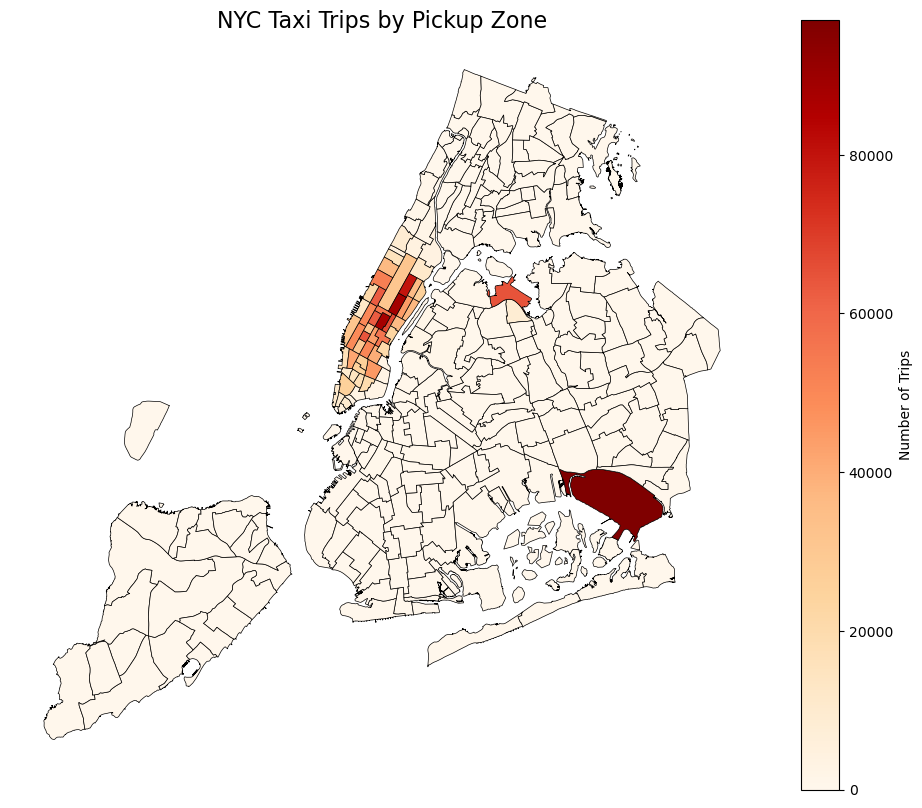

,LocationID,zone,borough,trip_count
133,132,JFK Airport,Queens,97047.0
238,237,Upper East Side South,Manhattan,88610.0
162,161,Midtown Center,Manhattan,87590.0
237,236,Upper East Side North,Manhattan,79756.0
163,162,Midtown East,Manhattan,66712.0
139,138,LaGuardia Airport,Queens,64449.0
187,186,Penn Station/Madison Sq West,Manhattan,64318.0
231,230,Times Sq/Theatre District,Manhattan,62672.0
143,142,Lincoln Square East,Manhattan,62664.0
171,170,Murray Hill,Manhattan,55933.0


In [10]:
# Define figure and axis


# Plot the map and display it
import matplotlib.pyplot as plt

# 1️⃣ Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))  # 12x10 inch figure

# 2️⃣ Plot the zones GeoDataFrame with trip counts
zones_with_trips.plot(
    column='trip_count',        # The column to color by
    ax=ax,                      # The axis to plot on
    legend=True,                # Show legend
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},  # Legend label and orientation
    cmap='OrRd',                # Color map (Orange-Red)
    edgecolor='black',          # Zone borders in black
    linewidth=0.5
)

# 3️⃣ Add a title
ax.set_title('NYC Taxi Trips by Pickup Zone', fontsize=16)

# 4️⃣ Remove axis for better visualization
ax.set_axis_off()

# 5️⃣ Display the plot
plt.show()

# 6️⃣ Optional: Display zones sorted by trip count
zones_sorted = zones_with_trips.sort_values(by='trip_count', ascending=False)
zones_sorted[['LocationID', 'zone', 'borough', 'trip_count']].head(10)



In [11]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by the number of trips in descending order
zones_sorted = zones_with_trips.sort_values(by='trip_count', ascending=False)

# Display top 10 busiest zones
zones_sorted[['LocationID', 'zone', 'borough', 'trip_count']].head(10)


,LocationID,zone,borough,trip_count
133,132,JFK Airport,Queens,97047.0
238,237,Upper East Side South,Manhattan,88610.0
162,161,Midtown Center,Manhattan,87590.0
237,236,Upper East Side North,Manhattan,79756.0
163,162,Midtown East,Manhattan,66712.0
139,138,LaGuardia Airport,Queens,64449.0
187,186,Penn Station/Madison Sq West,Manhattan,64318.0
231,230,Times Sq/Theatre District,Manhattan,62672.0
143,142,Lincoln Square East,Manhattan,62664.0
171,170,Murray Hill,Manhattan,55933.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [13]:
# Ensure pickup datetime is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Create pickup_hour column
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# If you also need trip_duration in minutes
df['trip_duration_min'] = (pd.to_datetime(df['tpep_dropoff_datetime']) - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Now group by route and hour
route_speed_by_hour = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_distance_mi=('trip_distance', 'mean'),
    avg_duration_hr=('trip_duration_min', lambda x: x.mean()/60)  # convert minutes to hours
).reset_index()

# Calculate average speed (mph)
route_speed_by_hour['avg_speed_mph'] = route_speed_by_hour['avg_distance_mi'] / route_speed_by_hour['avg_duration_hr']

# Find the slowest route for each hour
slowest_routes_by_hour = route_speed_by_hour.loc[route_speed_by_hour.groupby('pickup_hour')['avg_speed_mph'].idxmin()]

# Display the results
slowest_routes_by_hour[['pickup_hour', 'PULocationID', 'DOLocationID', 'avg_distance_mi', 'avg_duration_hr', 'avg_speed_mph']].sort_values('pickup_hour')


,pickup_hour,PULocationID,DOLocationID,avg_distance_mi,avg_duration_hr,avg_speed_mph
137415,0,265,215,12.70,-0.007778,-1632.857143
137097,1,265,32,16.12,-0.008889,-1813.500000
546,2,4,141,0.00,0.200556,0.000000
483,3,4,127,0.00,0.357778,0.000000
137115,4,265,41,0.49,-0.010000,-49.000000
28,5,1,264,0.00,0.000556,0.000000
137290,6,265,137,4.94,-0.000556,-8892.000000
137485,7,265,244,5.12,-0.000833,-6144.000000
6,8,1,1,0.00,0.006944,0.000000
137384,9,265,196,7.22,-0.003333,-2166.000000


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

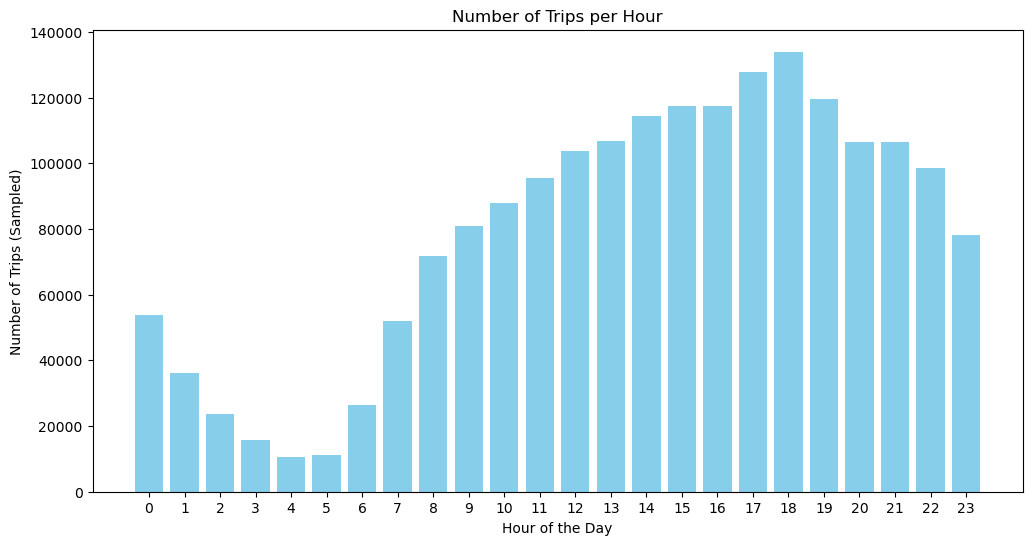

Busiest Hour (sampled data): 18
Number of trips (sampled): 133938
Top 5 busiest hours (scaled):
    pickup_hour  actual_num_trips
18           18         2678760.0
17           17         2557340.0
19           19         2393240.0
16           16         2350240.0
15           15         2348140.0


In [14]:
# Visualise the number of trips per hour and find the busiest hour

import matplotlib.pyplot as plt

# Ensure 'pickup_hour' exists (if not, create it)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# 3.2.2: Count number of trips per hour
trips_per_hour = df.groupby('pickup_hour').size().reset_index(name='num_trips')

# Visualize the trips per hour
plt.figure(figsize=(12,6))
plt.bar(trips_per_hour['pickup_hour'], trips_per_hour['num_trips'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips (Sampled)')
plt.title('Number of Trips per Hour')
plt.xticks(range(0,24))
plt.show()

# Find the busiest hour in the sample
busiest_hour = trips_per_hour.loc[trips_per_hour['num_trips'].idxmax()]
print("Busiest Hour (sampled data):", busiest_hour['pickup_hour'])
print("Number of trips (sampled):", busiest_hour['num_trips'])



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [16]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers


# 3.2.3: Scale up the numbers to actual trips
sample_fraction = 0.05  # Example: if you sampled 5% of data
trips_per_hour['actual_num_trips'] = trips_per_hour['num_trips'] / sample_fraction

# Find the top 5 busiest hours by actual number of trips
top_5_hours = trips_per_hour.sort_values('actual_num_trips', ascending=False).head(5)
print("Top 5 busiest hours (scaled):")
print(top_5_hours[['pickup_hour', 'actual_num_trips']])


Top 5 busiest hours (scaled):
    pickup_hour  actual_num_trips
18           18         2678760.0
17           17         2557340.0
19           19         2393240.0
16           16         2350240.0
15           15         2348140.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

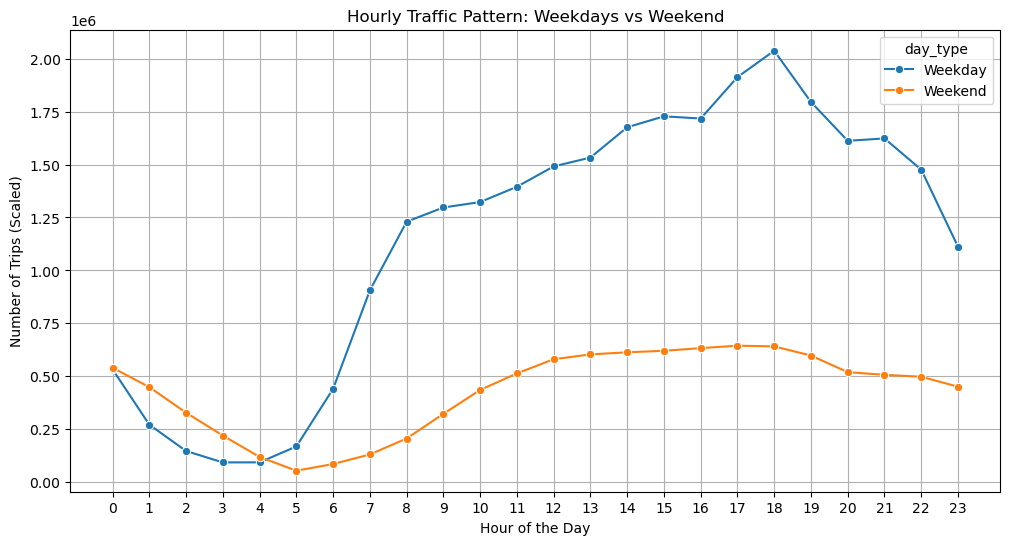

In [17]:
# Compare traffic trends for the week days and weekends

# Convert pickup datetime to datetime if not already
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract day of week (0=Monday, 6=Sunday)
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

# Define whether it is weekday or weekend
df['day_type'] = df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by day_type and hour
hourly_traffic = df.groupby(['day_type', 'pickup_hour']).size().reset_index(name='num_trips')

# Scale up by sampling fraction if needed
sample_fraction = 0.05  # fill in your actual fraction
hourly_traffic['actual_num_trips'] = hourly_traffic['num_trips'] / sample_fraction

# Plotting
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_traffic, x='pickup_hour', y='actual_num_trips', hue='day_type', marker='o')
plt.title('Hourly Traffic Pattern: Weekdays vs Weekend')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips (Scaled)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

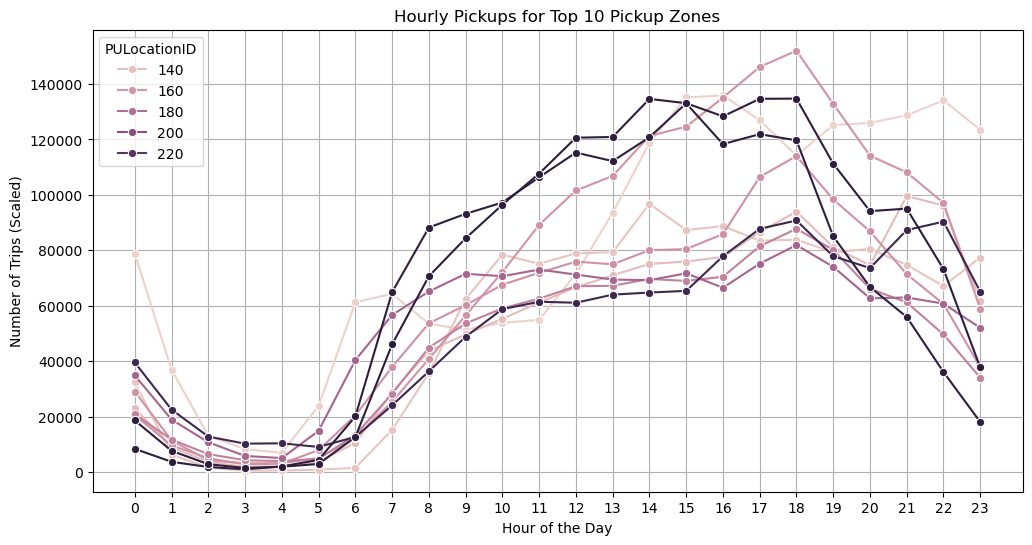

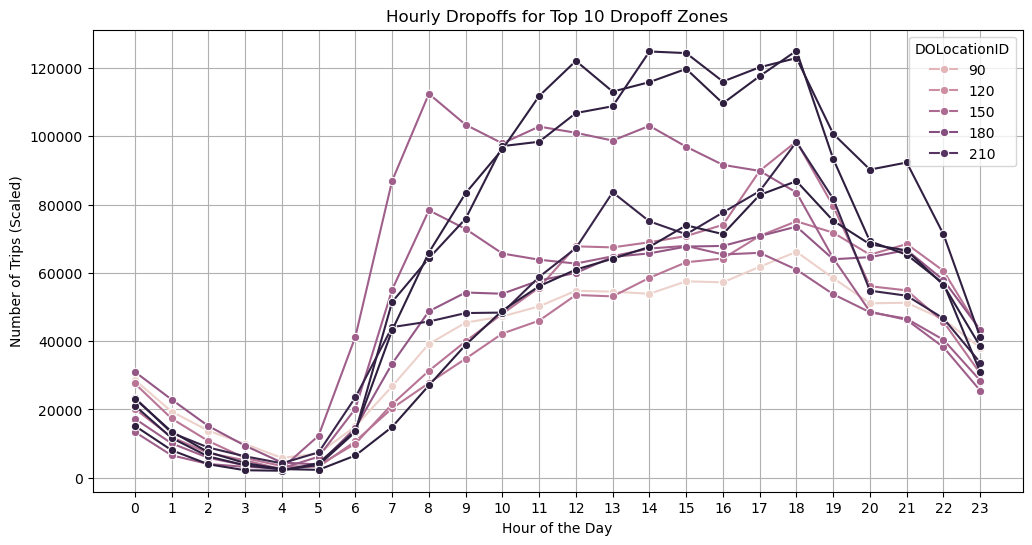

In [18]:
# Find top 10 pickup and dropoff zones

# Top 10 pickup zones
top10_pickup_zones = df.groupby('PULocationID').size().sort_values(ascending=False).head(10).index.tolist()

# Top 10 dropoff zones
top10_dropoff_zones = df.groupby('DOLocationID').size().sort_values(ascending=False).head(10).index.tolist()

# Hourly pickups for top 10 pickup zones
pickup_hourly = df[df['PULocationID'].isin(top10_pickup_zones)]
pickup_hourly = pickup_hourly.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='num_trips')

# Hourly dropoffs for top 10 dropoff zones
dropoff_hourly = df[df['DOLocationID'].isin(top10_dropoff_zones)]
dropoff_hourly = dropoff_hourly.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='num_trips')

# Scale up by sampling fraction if needed
sample_fraction = 0.05  # replace with your actual fraction
pickup_hourly['actual_num_trips'] = pickup_hourly['num_trips'] / sample_fraction
dropoff_hourly['actual_num_trips'] = dropoff_hourly['num_trips'] / sample_fraction

# Plot pickups
plt.figure(figsize=(12,6))
sns.lineplot(data=pickup_hourly, x='pickup_hour', y='actual_num_trips', hue='PULocationID', marker='o')
plt.title('Hourly Pickups for Top 10 Pickup Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips (Scaled)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

# Plot dropoffs
plt.figure(figsize=(12,6))
sns.lineplot(data=dropoff_hourly, x='pickup_hour', y='actual_num_trips', hue='DOLocationID', marker='o')
plt.title('Hourly Dropoffs for Top 10 Dropoff Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips (Scaled)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [20]:
import numpy as np  # add this at the top if not already imported
import pandas as pd

# Group by zone for pickups and dropoffs
pickup_counts = df.groupby('PULocationID').size().rename('pickup_count')
dropoff_counts = df.groupby('DOLocationID').size().rename('dropoff_count')

# Combine into a single DataFrame
zone_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Calculate pickup/dropoff ratio
zone_counts['pickup_drop_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count'].replace(0, np.nan)

# Top 10 highest ratios
top10_ratios = zone_counts.sort_values('pickup_drop_ratio', ascending=False).head(10)

# Bottom 10 lowest ratios
bottom10_ratios = zone_counts.sort_values('pickup_drop_ratio', ascending=True).head(10)

print("Top 10 Zones with Highest Pickup/Dropoff Ratio:\n", top10_ratios)
print("\nBottom 10 Zones with Lowest Pickup/Dropoff Ratio:\n", bottom10_ratios)


Top 10 Zones with Highest Pickup/Dropoff Ratio:
      pickup_count  dropoff_count  pickup_drop_ratio
70         8410.0         1032.0           8.149225
132       97047.0        22762.0           4.263553
138       64449.0        24593.0           2.620624
186       64318.0        41310.0           1.556960
114       25121.0        18248.0           1.376644
43        31332.0        22891.0           1.368748
249       41951.0        31486.0           1.332370
162       66712.0        53701.0           1.242286
161       87590.0        73729.0           1.187999
100       30813.0        25959.0           1.186987

Bottom 10 Zones with Lowest Pickup/Dropoff Ratio:
      pickup_count  dropoff_count  pickup_drop_ratio
176           0.0           13.0           0.000000
99            0.0            3.0           0.000000
30            0.0           18.0           0.000000
245           1.0           31.0           0.032258
1           218.0         5744.0           0.037953
115           1

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [21]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

import pandas as pd

# Define night hours (11 PM to 5 AM)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter trips during night hours
night_trips = df[df['pickup_hour'].isin(night_hours)]

# Top 10 pickup zones during night
top10_night_pickups = night_trips.groupby('PULocationID').size().sort_values(ascending=False).head(10)

# Top 10 dropoff zones during night
top10_night_dropoffs = night_trips.groupby('DOLocationID').size().sort_values(ascending=False).head(10)

print("Top 10 Pickup Zones (Night 11PM-5AM):\n", top10_night_pickups)
print("\nTop 10 Dropoff Zones (Night 11PM-5AM):\n", top10_night_dropoffs)


Top 10 Pickup Zones (Night 11PM-5AM):
 PULocationID
79     16466
132    14584
249    13144
48     10834
148    10191
114     9193
230     8500
186     7135
164     6468
68      6402
dtype: int64

Top 10 Dropoff Zones (Night 11PM-5AM):
 DOLocationID
79     8714
48     7220
170    6502
68     6132
107    5946
141    5546
263    5279
249    5128
230    4850
148    4627
dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [23]:
# Filter for night hours (11 PM to 5 AM)

# Define night hours (11 PM to 5 AM)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter night trips
night_trips = df[df['pickup_hour'].isin(night_hours)]

# Filter day trips (all other hours)
day_trips = df[~df['pickup_hour'].isin(night_hours)]

# Calculate total revenue for night and day
night_revenue = night_trips['total_amount'].sum()
day_revenue = day_trips['total_amount'].sum()

# Total revenue
total_revenue = night_revenue + day_revenue

# Calculate revenue share
night_share = night_revenue / total_revenue * 100
day_share = day_revenue / total_revenue * 100

print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_share:.2f}%")
print(f"Daytime Revenue Share (6 AM - 10 PM): {day_share:.2f}%")


Nighttime Revenue Share (11 PM - 5 AM): 12.30%
Daytime Revenue Share (6 AM - 10 PM): 87.70%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [25]:
# Remove trips with zero distance or zero passengers and create a proper copy
df_valid = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()

# Calculate fare per mile per passenger
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_amount'] / (df_valid['trip_distance'] * df_valid['passenger_count'])

# Group by passenger count and find average
avg_fare_per_mile_per_passenger = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Display results
print(avg_fare_per_mile_per_passenger)


   passenger_count  fare_per_mile_per_passenger
0              1.0                    11.056665
1              2.0                     6.431487
2              3.0                     3.907755
3              4.0                     4.428906
4              5.0                     1.709614
5              6.0                     1.350658
6              7.0                     1.308835
7              8.0                    28.627266
8              9.0                    76.098002


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average fare per mile by hour:
    pickup_hour  fare_per_mile
0             0      10.466386
1             1      11.202964
2             2       9.871868
3             3      10.799226
4             4      13.226922
5             5      13.890646
6             6      10.983712
7             7      10.152037
8             8      10.305608
9             9      10.463626
10           10      13.102564
11           11      10.937661
12           12      11.989730
13           13      11.937143
14           14      11.632234
15           15      12.495333
16           16      13.814227
17           17      11.965810
18           18      11.535023
19           19      11.561168
20           20       9.559720
21           21       9.484443
22           22      10.124659
23           23      10.731431

Average fare per mile by day of week:
   pickup_dayofweek  fare_per_mile
0                 0      10.925436
1                 1      12.077255
2                 2      11.046350
3              

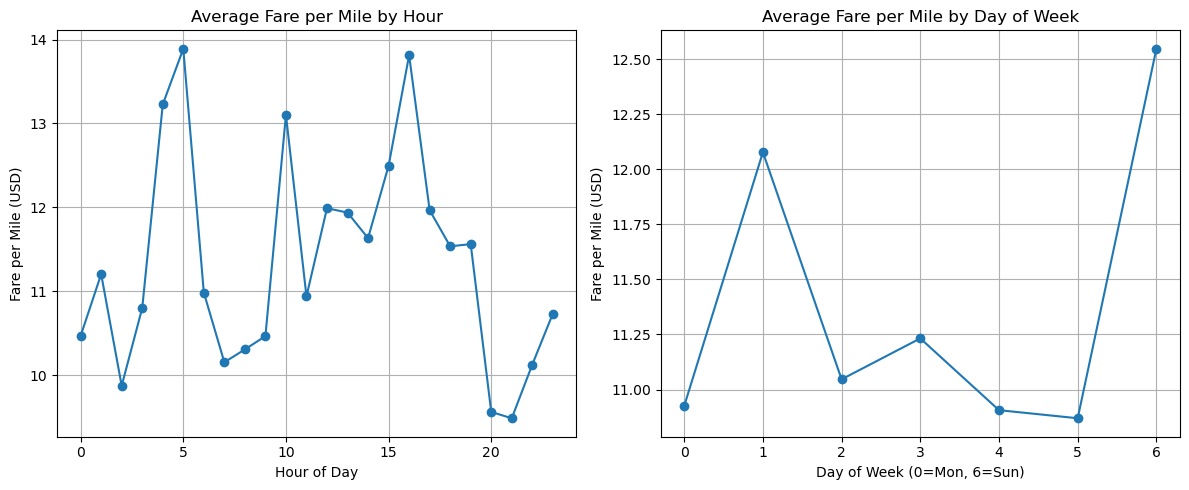

In [26]:
# Compare the average fare per mile for different days and for different times of the day

# Make sure we only consider trips with distance > 0
df_valid = df[df['trip_distance'] > 0].copy()

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Average fare per mile by hour
avg_fare_by_hour = df_valid.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Average fare per mile by day of week
avg_fare_by_day = df_valid.groupby('pickup_dayofweek')['fare_per_mile'].mean().reset_index()

# Display results
print("Average fare per mile by hour:")
print(avg_fare_by_hour)

print("\nAverage fare per mile by day of week:")
print(avg_fare_by_day)

# Optional: Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Hourly fare per mile
plt.subplot(1,2,1)
plt.plot(avg_fare_by_hour['pickup_hour'], avg_fare_by_hour['fare_per_mile'], marker='o')
plt.title('Average Fare per Mile by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)

# Daily fare per mile
plt.subplot(1,2,2)
plt.plot(avg_fare_by_day['pickup_dayofweek'], avg_fare_by_day['fare_per_mile'], marker='o')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

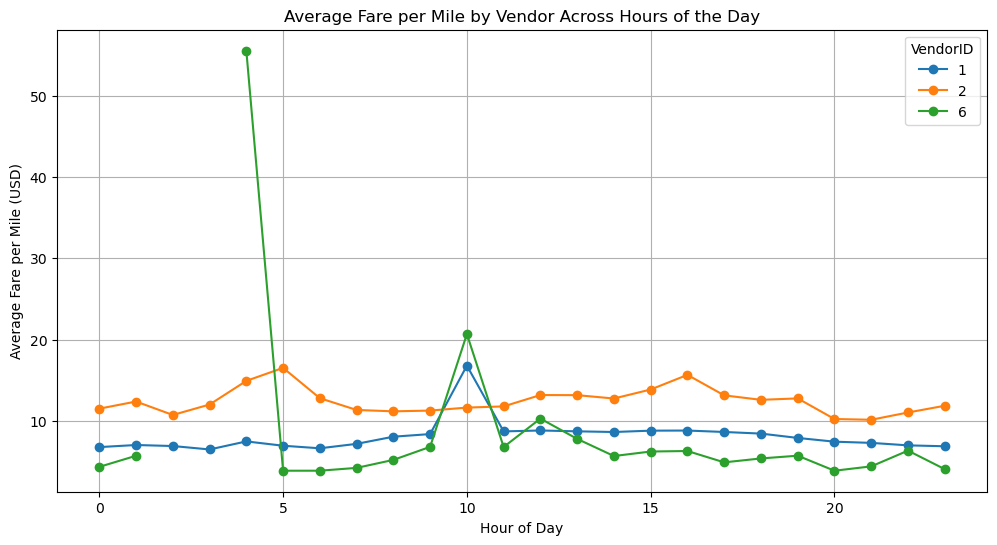

In [27]:
# Compare fare per mile for different vendors
# Calculate fare per mile for each trip (avoid division by zero)
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance'].replace(0, np.nan)

# Group by VendorID and pickup_hour to find the average fare per mile
vendor_hourly_fare = df_valid.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

# Optionally, pivot the table for easier visualization
vendor_hourly_fare_pivot = vendor_hourly_fare.pivot(index='pickup_hour', columns='VendorID', values='fare_per_mile')

# Plot the fare per mile for different vendors across hours of the day
vendor_hourly_fare_pivot.plot(figsize=(12,6), marker='o')
plt.title('Average Fare per Mile by Vendor Across Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.grid(True)
plt.legend(title='VendorID')
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


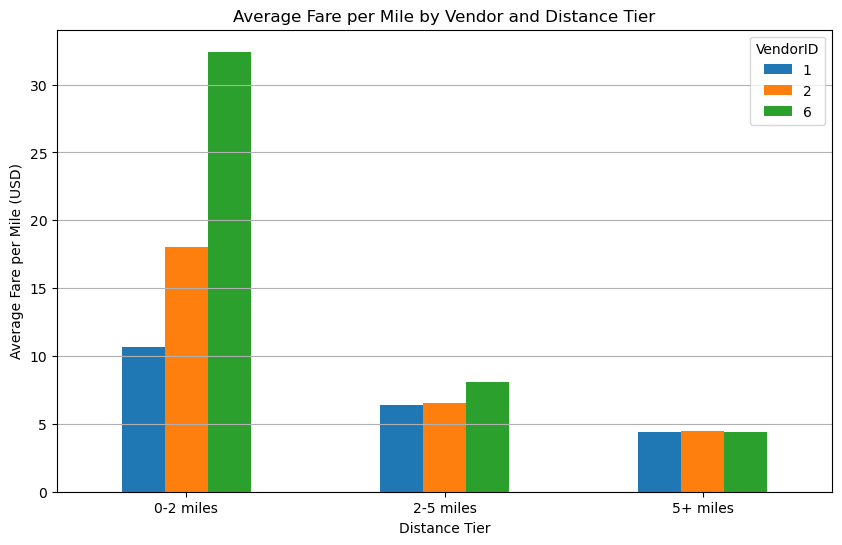

In [28]:
# Defining distance tiers
# Define distance tiers
def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

# Create a new column for distance tier
df_valid['distance_tier'] = df_valid['trip_distance'].apply(distance_tier)

# Compute average fare per mile for each VendorID in each distance tier
tiered_fare = df_valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Pivot for visualization
tiered_fare_pivot = tiered_fare.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile')

# Plot the tiered fare comparison
tiered_fare_pivot.plot(kind='bar', figsize=(10,6))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='VendorID')
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

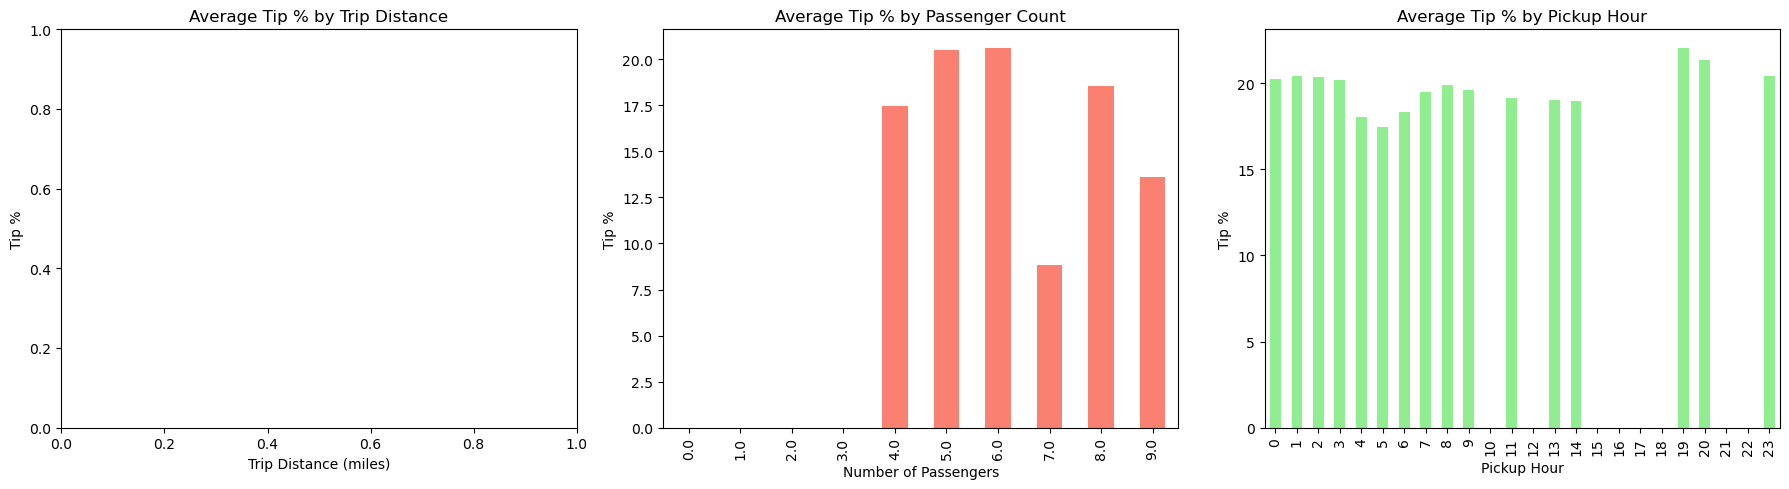

In [32]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage for each trip
df_valid['tip_pct'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100

# Average tip percentage by trip distance bins
distance_bins = [0, 2, 5, 10, 20, 50]
df_valid['distance_bin'] = pd.cut(df_valid['trip_distance'], bins=distance_bins)
avg_tip_by_distance = df_valid.groupby('distance_bin', observed=True)['tip_pct'].mean()


# Average tip percentage by passenger count
avg_tip_by_passengers = df_valid.groupby('passenger_count')['tip_pct'].mean()

# Average tip percentage by pickup hour
avg_tip_by_hour = df_valid.groupby('pickup_hour')['tip_pct'].mean()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Tip % by distance
avg_tip_by_distance = df_valid.groupby('distance_bin', observed=True)['tip_pct'].mean()

axes[0].set_title('Average Tip % by Trip Distance')
axes[0].set_xlabel('Trip Distance (miles)')
axes[0].set_ylabel('Tip %')

# Tip % by passenger count
avg_tip_by_passengers.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Average Tip % by Passenger Count')
axes[1].set_xlabel('Number of Passengers')
axes[1].set_ylabel('Tip %')

# Tip % by pickup hour
avg_tip_by_hour.plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Average Tip % by Pickup Hour')
axes[2].set_xlabel('Pickup Hour')
axes[2].set_ylabel('Tip %')

plt.tight_layout()
plt.show()

# Insights:
# - Low trip distances might lead to lower tip percentages due to small fare amounts.
# - Certain hours may see lower tipping patterns (e.g., late night or early morning).
# - Very hig


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [33]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Define thresholds for low and high tips
low_tip_threshold = 10    # tip percentage < 10%
high_tip_threshold = 25   # tip percentage > 25%

# Separate the trips into low tip and high tip groups
low_tip_trips = df_valid[df_valid['tip_pct'] < low_tip_threshold]
high_tip_trips = df_valid[df_valid['tip_pct'] > high_tip_threshold]

# Compare average trip characteristics for these two groups
comparison = pd.DataFrame({
    'Low Tip Avg': [
        low_tip_trips['trip_distance'].mean(),
        low_tip_trips['trip_duration_min'].mean(),
        low_tip_trips['passenger_count'].mean(),
        low_tip_trips['fare_amount'].mean()
    ],
    'High Tip Avg': [
        high_tip_trips['trip_distance'].mean(),
        high_tip_trips['trip_duration_min'].mean(),
        high_tip_trips['passenger_count'].mean(),
        high_tip_trips['fare_amount'].mean()
    ]
}, index=['Trip Distance', 'Trip Duration (min)', 'Passenger Count', 'Fare Amount'])

# Display the comparison
print(comparison)


                     Low Tip Avg  High Tip Avg
Trip Distance           4.458703      2.431302
Trip Duration (min)    20.097112     12.755564
Passenger Count         1.412650      1.348093
Fare Amount            21.963865     14.440392


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

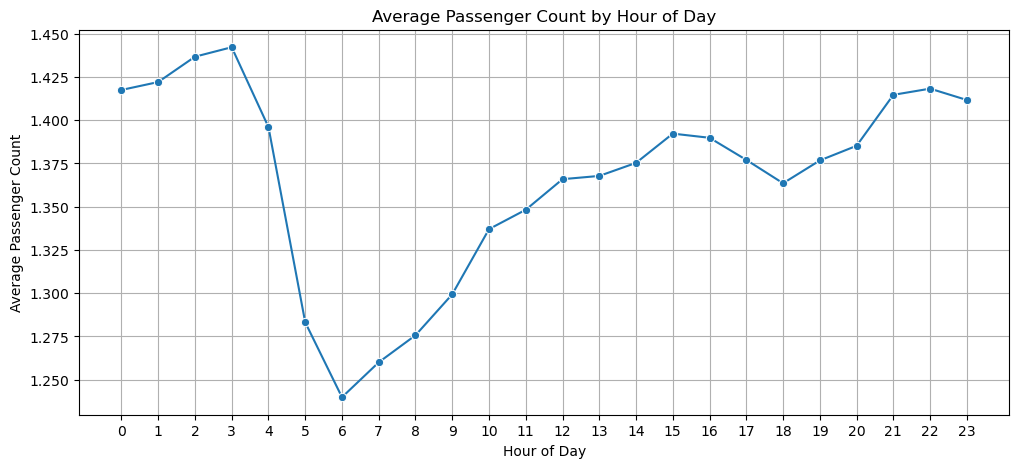

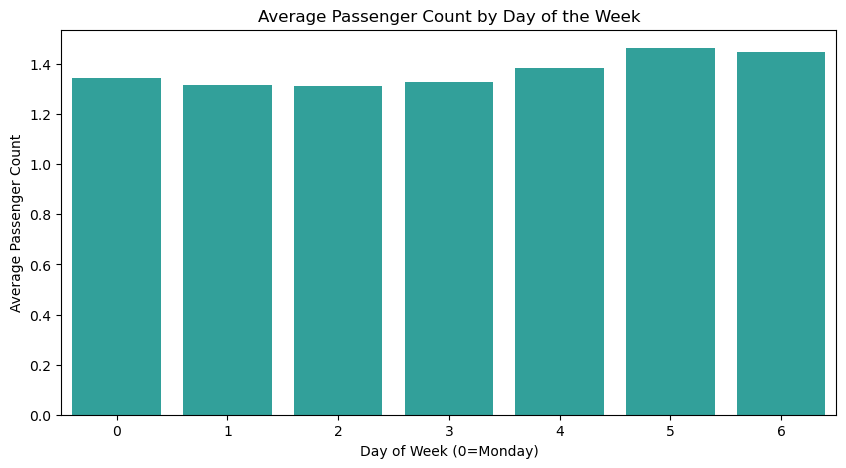

In [35]:
# See how passenger count varies across hours and days

# Analyse variation of passenger count across hours
avg_passenger_by_hour = df_valid.groupby('pickup_hour')['passenger_count'].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=avg_passenger_by_hour.index, y=avg_passenger_by_hour.values, marker='o')
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


# Analyse variation of passenger count across days of the week
avg_passenger_by_day = df_valid.groupby('pickup_dayofweek')['passenger_count'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=avg_passenger_by_day.index, y=avg_passenger_by_day.values, color="lightseagreen")  # specify color instead of palette
plt.title("Average Passenger Count by Day of the Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Average Passenger Count")
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [38]:
# How does passenger count vary across zones
# Group data by pickup zones and calculate average passenger count
avg_passenger_by_zone = df_valid.groupby('PULocationID')['passenger_count'].mean().sort_values(ascending=False)

# Display top 10 zones with highest average passenger count
print("Top 10 zones by average passenger count:")
print(avg_passenger_by_zone.head(10))

# Optional: display top zones by average passenger count
top_zones = zones_with_trips[['zone', 'passenger_count']].sort_values('passenger_count', ascending=False)
print(top_zones.head(10))


Top 10 zones by average passenger count:
PULocationID
6      1.954545
195    1.817204
12     1.725707
207    1.666667
58     1.666667
178    1.625000
66     1.582393
194    1.550000
261    1.531089
45     1.527183
Name: passenger_count, dtype: float64
                                 zone  passenger_count
5             Arrochar/Fort Wadsworth         1.954545
194                          Red Hook         1.817204
11                       Battery Park         1.725707
206  Saint Michaels Cemetery/Woodside         1.666667
57                       Country Club         1.666667
177               Ocean Parkway South         1.625000
65                 DUMBO/Vinegar Hill         1.582393
193                   Randalls Island         1.550000
260                World Trade Center         1.531089
44                          Chinatown         1.527183


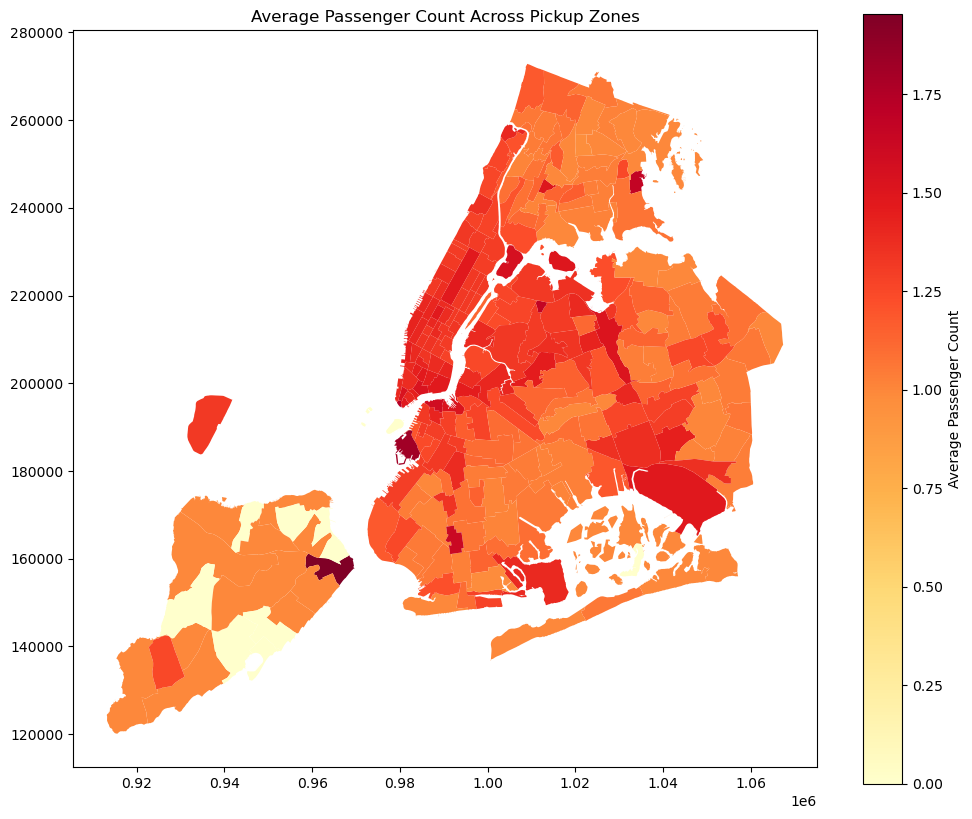

In [37]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Calculate average passenger count per pickup zone
zone_avg_passenger = df_valid.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge the average passenger count into the zones GeoDataFrame
zones_with_trips = zones.merge(zone_avg_passenger, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values (zones with no trips in the sampled data) with 0
zones_with_trips['passenger_count'] = zones_with_trips['passenger_count'].fillna(0)

# Visualize the average passenger count across zones
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(column='passenger_count', ax=ax, legend=True,
                      legend_kwds={'label': "Average Passenger Count", 'orientation': "vertical"},
                      cmap='YlOrRd')
plt.title("Average Passenger Count Across Pickup Zones")
plt.show()




Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

               Surcharge    Count
2  improvement_surcharge  1858460
1                mta_tax  1846520
3   congestion_surcharge  1680354
0                  extra  1131649
5           tolls_amount   151363
4            airport_fee    12791


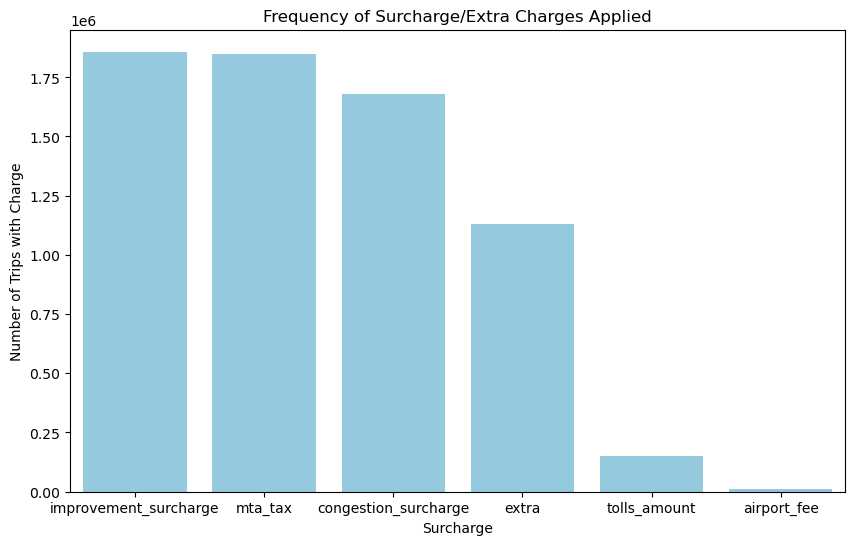

                 extra   mta_tax  improvement_surcharge  congestion_surcharge  \
PULocationID                                                                    
59            1.000000  1.000000               1.000000              1.000000   
187           1.000000  1.000000               1.000000              1.000000   
199           1.000000  1.000000               1.000000              0.500000   
138           0.987461  0.991198               0.999844              0.641365   
70            0.837353  0.990062               0.999758              0.628893   
148           0.797876  0.994533               0.999844              0.950224   
114           0.775456  0.997004               1.000000              0.967853   
79            0.745007  0.996731               0.999887              0.958767   
249           0.738945  0.997238               0.999952              0.971675   
144           0.708675  0.996316               0.999941              0.959002   

              airport_fee  

In [40]:
# How often is each surcharge applied?
# List of surcharge/extra charge columns
surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee', 'tolls_amount']

# Calculate how often each surcharge is applied (non-zero values)
surcharge_counts = {}
for col in surcharge_cols:
    surcharge_counts[col] = (df_valid[col] > 0).sum()

# Convert to DataFrame for better visualization
surcharge_df = pd.DataFrame(list(surcharge_counts.items()), columns=['Surcharge', 'Count']).sort_values('Count', ascending=False)
print(surcharge_df)

# Optional: visualize using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Surcharge', y='Count', data=surcharge_df, color='skyblue')  # simple fix without palette warning
plt.title("Frequency of Surcharge/Extra Charges Applied")
plt.ylabel("Number of Trips with Charge")
plt.show()


# Analyse by pickup zones: proportion of trips with extra charges
pickup_surcharge = df_valid.groupby('PULocationID')[surcharge_cols].apply(lambda x: (x>0).sum())
pickup_surcharge_ratio = pickup_surcharge.div(df_valid.groupby('PULocationID').size(), axis=0)
pickup_surcharge_ratio = pickup_surcharge_ratio.sort_values(by='extra', ascending=False)  # or any surcharge of interest
print(pickup_surcharge_ratio.head(10))

# Analyse by dropoff zones similarly
dropoff_surcharge = df_valid.groupby('DOLocationID')[surcharge_cols].apply(lambda x: (x>0).sum())
dropoff_surcharge_ratio = dropoff_surcharge.div(df_valid.groupby('DOLocationID').size(), axis=0)
dropoff_surcharge_ratio = dropoff_surcharge_ratio.sort_values(by='extra', ascending=False)
print(dropoff_surcharge_ratio.head(10))

# Optional: Analyse by hour of day
hourly_surcharge = df_valid.groupby('pickup_hour')[surcharge_cols].apply(lambda x: (x>0).sum())
hourly_surcharge_ratio = hourly_surcharge.div(df_valid.groupby('pickup_hour').size(), axis=0)
print(hourly_surcharge_ratio)



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### 4.1.1 Recommendations for routing and dispatch [5 marks]
- Optimize vehicle allocation based on peak hours and zones.
- Reduce bottlenecks on slow routes.
- Adjust fleet distribution for high night traffic.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### 4.1.2 Pricing strategy recommendations [5 marks]
- Dynamic pricing based on passenger count, distance, and time of day.
- Incentivize trips in low-demand hours or zones.m

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### 4.1.3 Operational and customer experience insights [5 marks]
- Insights from tipping behavior, surcharge patterns.
- Zone-based service optimization.
- Weekday/weekend traffic trends.